Segmenting cytoplasm images and deriving jaccard scores for performance comparison

In [9]:
import sys
import numpy as np
from skimage import filters
from skimage import exposure
from skimage import morphology
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage.morphology import square
from sklearn.metrics import jaccard_score
from skimage import io, data, img_as_ubyte, img_as_float, exposure
from scipy.ndimage import convolve, gaussian_filter, median_filter, sobel
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma

from sklearn.cluster import KMeans
from skimage.color import label2rgb
from skimage import io, data, img_as_ubyte
from skimage.color import rgb2hsv, rgb2lab
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.future import graph
from skimage.morphology import disk
from skimage.segmentation import watershed, slic
from skimage.filters import rank
from scipy import ndimage as ndi

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity

from sklearn.preprocessing import StandardScaler

In [11]:
# image and ground truth paths

im_path = 'C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM'
gt_path = 'C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/GT'

In [12]:
# checking image load list
os.listdir(im_path) == os.listdir(gt_path)

# since the images are in the same order, we can use the same index for loading and comparing the segmented images and the ground truth

True

In [13]:
# loading images and ground truth images

original_images = []
ground_truth_images = []

im_names = os.listdir(im_path)

for elem in im_names:
    original_images.append(io.imread(im_path + '/' + elem))
    ground_truth_images.append(invert(io.imread(gt_path + '/' + elem))) # invert the ground truth image as the are inverted

Pre processing the images for better visual representation

In [14]:
adjusted_images = []

for im in original_images:
    
    img_cont = exposure.rescale_intensity(im)
    img_gamma_adj = exposure.adjust_gamma(img_cont, 0.6)
    
    adjusted_images.append(img_gamma_adj)

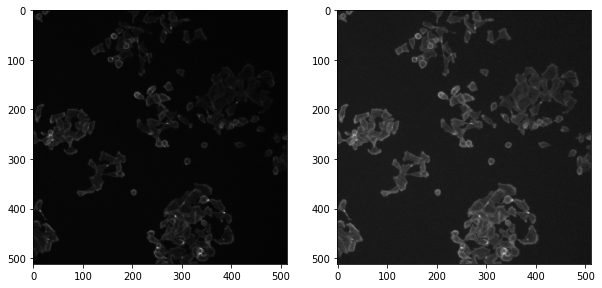

In [7]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 2, 1)
plt.imshow(original_images[0], cmap='gray')

ax = fig.add_subplot(1, 2, 2)
plt.imshow(adjusted_images[0], cmap='gray')

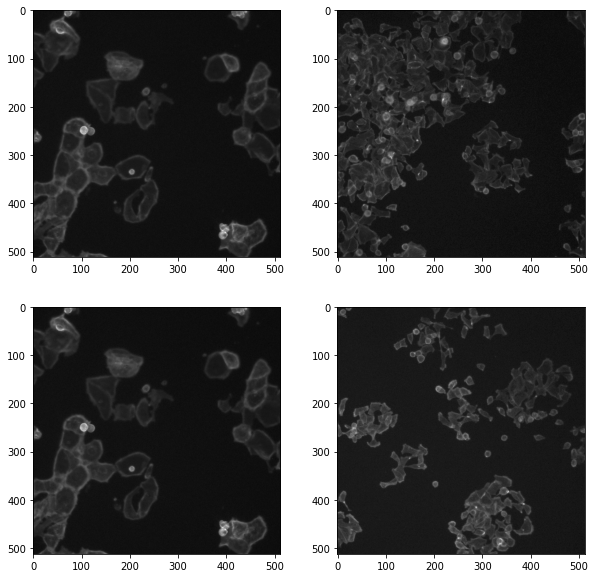

In [23]:
ind = [np.random.randint(0,10) for i in range(12)]

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)
plt.imshow(adjusted_images[ind[0]], cmap='gray')

ax = fig.add_subplot(2, 2, 2)
plt.imshow(adjusted_images[ind[1]], cmap='gray')

ax = fig.add_subplot(2, 2, 3)
plt.imshow(adjusted_images[ind[2]], cmap='gray')

ax = fig.add_subplot(2, 2, 4)
plt.imshow(adjusted_images[ind[3]], cmap='gray')

Applying mean thresholding and computing jaccars score

In [83]:
mean_threshold_images = []

for im in adjusted_images:
    # image threshold
    imt = im > filters.threshold_mean(im)
    mean_threshold_images.append(imt)

# computing the mean thresholded image jaccard score
mean_threshold_jaccard_scores = []

for i in range(len(mean_threshold_images)):
    mean_threshold_jaccard_scores.append(jaccard_score(ground_truth_images[i], mean_threshold_images[i], average='micro'))

print('Mean thresholded jaccard scores: ', mean_threshold_jaccard_scores)

print('Average Mean thresholded jaccard score: ', np.mean(mean_threshold_jaccard_scores))

Mean thresholded jaccard scores:  [0.885945039171264, 0.890129357273348, 0.8998306893886414, 0.7695137449000067, 0.6639072386208434, 0.7442340060958043, 0.9290825068799003, 0.8811993280257103, 0.9174712556636755, 0.9330304059792763, 0.9155034048865931, 0.9114732258903041]
Average Mean thresholded jaccard score:  0.861776683564614


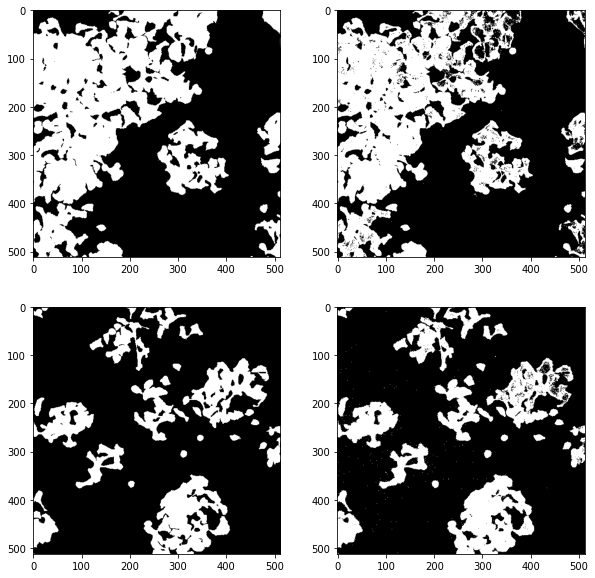

In [33]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)
plt.imshow(ground_truth_images[ind[1]], cmap='gray')

ax = fig.add_subplot(2, 2, 2)
plt.imshow(mean_threshold_images[ind[1]], cmap='gray')

ax = fig.add_subplot(2, 2, 3)
plt.imshow(ground_truth_images[ind[3]], cmap='gray')

ax = fig.add_subplot(2, 2, 4)
plt.imshow(mean_threshold_images[ind[3]], cmap='gray')

In [40]:
# region filling and jaccard score
mean_threshold_jaccard_scores = []
se = morphology.disk(2)

for i in range(len(mean_threshold_images)):
    mean_threshold_images[i] = morphology.binary_closing(mean_threshold_images[i], se)
    mean_threshold_jaccard_scores.append(jaccard_score(ground_truth_images[i], mean_threshold_images[i], average='micro'))

print('Mean thresholded jaccard scores: ', mean_threshold_jaccard_scores)

print('Average Mean thresholded jaccard score: ', np.mean(mean_threshold_jaccard_scores))

Mean thresholded jaccard scores:  [0.8014310725431986, 0.8334789633342126, 0.9085156037067321, 0.30239356268368195, 0.16416645420028803, 0.277198867229386, 0.943793167052651, 0.940807725138711, 0.9224889759921607, 0.8732192977810729, 0.9408591267920476, 0.8850768944561578]
Average Mean thresholded jaccard score:  0.7327858092425249


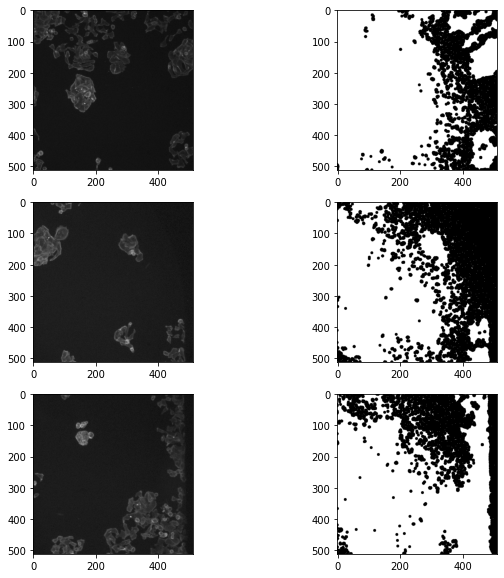

In [42]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(3, 2, 1)
plt.imshow(adjusted_images[3], cmap='gray')

ax = fig.add_subplot(3, 2, 2)
plt.imshow(mean_threshold_images[3], cmap='gray')

ax = fig.add_subplot(3, 2, 3)
plt.imshow(adjusted_images[4], cmap='gray')

ax = fig.add_subplot(3, 2, 4)
plt.imshow(mean_threshold_images[4], cmap='gray')

ax = fig.add_subplot(3, 2, 5)
plt.imshow(adjusted_images[5], cmap='gray')

ax = fig.add_subplot(3, 2, 6)
plt.imshow(mean_threshold_images[5], cmap='gray')

Applying mean thresholding and computing jaccars score directly on images

In [43]:
mean_threshold_images = []

for im in original_images:
    # image threshold
    imt = im > filters.threshold_mean(im)
    mean_threshold_images.append(imt)

# computing the mean thresholded image jaccard score
mean_threshold_jaccard_scores = []

for i in range(len(mean_threshold_images)):
    mean_threshold_jaccard_scores.append(jaccard_score(ground_truth_images[i], mean_threshold_images[i], average='micro'))

print('Mean thresholded jaccard scores: ', mean_threshold_jaccard_scores)

print('Average Mean thresholded jaccard score: ', np.mean(mean_threshold_jaccard_scores))

Mean thresholded jaccard scores:  [0.885945039171264, 0.8222878731926256, 0.795749661318416, 0.9564285101638219, 0.6639072386208434, 0.7442340060958043, 0.8738658808369509, 0.7733993296864868, 0.901506689180413, 0.9553307793643343, 0.8097812002517493, 0.9172924613831916]
Average Mean thresholded jaccard score:  0.8416440557721582


Mean thresholding on ajdusted images perform better segmentation than when applied directly on the raw images 

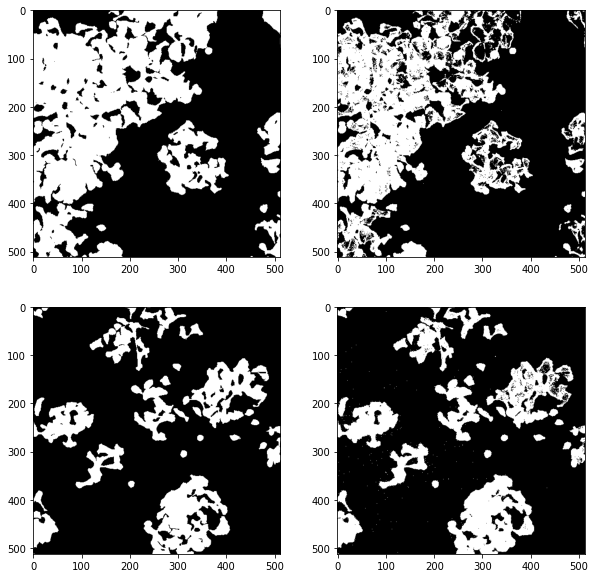

In [44]:
# plotting segmented images from the mean thresholded on raw images
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)
plt.imshow(ground_truth_images[ind[1]], cmap='gray')

ax = fig.add_subplot(2, 2, 2)
plt.imshow(mean_threshold_images[ind[1]], cmap='gray')

ax = fig.add_subplot(2, 2, 3)
plt.imshow(ground_truth_images[ind[3]], cmap='gray')

ax = fig.add_subplot(2, 2, 4)
plt.imshow(mean_threshold_images[ind[3]], cmap='gray')

In [45]:
# region filling and jaccard score
mean_threshold_jaccard_scores = []
se = morphology.disk(2)

for i in range(len(mean_threshold_images)):
    mean_threshold_images[i] = morphology.binary_closing(mean_threshold_images[i], se)
    mean_threshold_jaccard_scores.append(jaccard_score(ground_truth_images[i], mean_threshold_images[i], average='micro'))

print('Mean thresholded jaccard scores: ', mean_threshold_jaccard_scores)

print('Average Mean thresholded jaccard score: ', np.mean(mean_threshold_jaccard_scores))

Mean thresholded jaccard scores:  [0.8784209820230748, 0.8787716660363261, 0.8682314091804715, 0.9653492785998623, 0.48619415930287135, 0.6011532283200268, 0.924089730345133, 0.8328561789966994, 0.9198510654745033, 0.9796574360522146, 0.8525396210402022, 0.9432730240783567]
Average Mean thresholded jaccard score:  0.8441989816208119


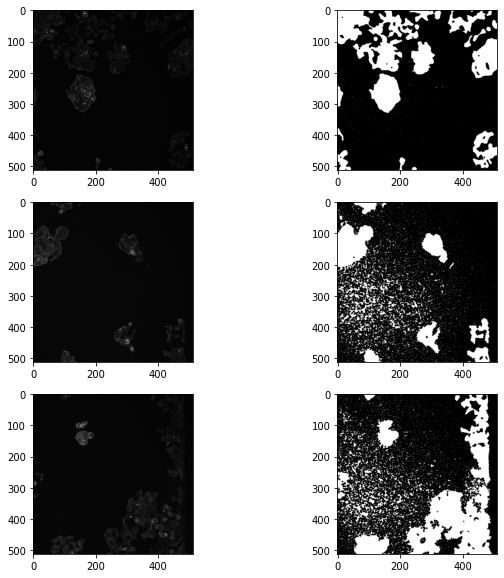

In [47]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(3, 2, 1)
plt.imshow(original_images[3], cmap='gray')

ax = fig.add_subplot(3, 2, 2)
plt.imshow(mean_threshold_images[3], cmap='gray')

ax = fig.add_subplot(3, 2, 3)
plt.imshow(original_images[4], cmap='gray')

ax = fig.add_subplot(3, 2, 4)
plt.imshow(mean_threshold_images[4], cmap='gray')

ax = fig.add_subplot(3, 2, 5)
plt.imshow(original_images[5], cmap='gray')

ax = fig.add_subplot(3, 2, 6)
plt.imshow(mean_threshold_images[5], cmap='gray')

Applying multi otsu thresholding and computing jaccars score

In [49]:
otsu_segmented_images = []
otsu_threshold_jaccard_scores = []

for im in original_images:
    # image threshold
    thresholds = filters.threshold_multiotsu(im, classes=3)
    regions = np.digitize(im, bins=thresholds)
    regions[regions>0] = 1
    otsu_segmented_images.append(regions)

for i in range(len(mean_threshold_images)):
    otsu_threshold_jaccard_scores.append(jaccard_score(ground_truth_images[i], otsu_segmented_images[i], average='micro'))

print('Mean thresholded jaccard scores: ', otsu_threshold_jaccard_scores)

print('Average Mean thresholded jaccard score: ', np.mean(otsu_threshold_jaccard_scores))

Mean thresholded jaccard scores:  [0.8915746488674028, 0.890129357273348, 0.795749661318416, 0.8700204201709757, 0.9159924544120729, 0.7747621214219303, 0.5459170419120194, 0.473737567471299, 0.5326254313777542, 0.5098366122040681, 0.5669692109435117, 0.5314196783676293]
Average Mean thresholded jaccard score:  0.6915611838117023


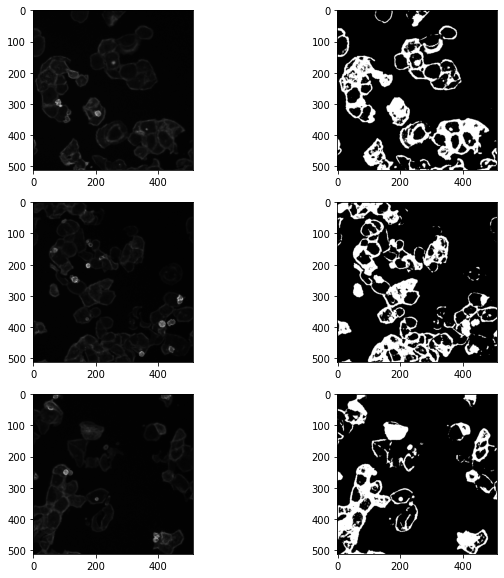

In [50]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(3, 2, 1)
plt.imshow(original_images[6], cmap='gray')

ax = fig.add_subplot(3, 2, 2)
plt.imshow(otsu_segmented_images[6], cmap='gray')

ax = fig.add_subplot(3, 2, 3)
plt.imshow(original_images[7], cmap='gray')

ax = fig.add_subplot(3, 2, 4)
plt.imshow(otsu_segmented_images[7], cmap='gray')

ax = fig.add_subplot(3, 2, 5)
plt.imshow(original_images[8], cmap='gray')

ax = fig.add_subplot(3, 2, 6)
plt.imshow(otsu_segmented_images[8], cmap='gray')

Or operation on mean and otsu

In [93]:
# logical or and jaccard score

logical_or_images = []
logical_or_jaccard_scores = []

for i in range(len(otsu_segmented_images)):
    im = np.logical_or(otsu_segmented_images[i],mean_threshold_images[i])
    logical_or_images.append(im)


for i in range(len(mean_threshold_images)):
    logical_or_jaccard_scores.append(jaccard_score(ground_truth_images[i], logical_or_images[i], average='micro'))

print('Mean thresholded jaccard scores: ', logical_or_jaccard_scores)

print('Average Mean thresholded jaccard score: ', np.mean(logical_or_jaccard_scores))

Mean thresholded jaccard scores:  [0.885945039171264, 0.890129357273348, 0.8998306893886414, 0.7695137449000067, 0.6639072386208434, 0.7442340060958043, 0.9290825068799003, 0.8811993280257103, 0.9174712556636755, 0.9330304059792763, 0.9155034048865931, 0.9114732258903041]
Average Mean thresholded jaccard score:  0.861776683564614


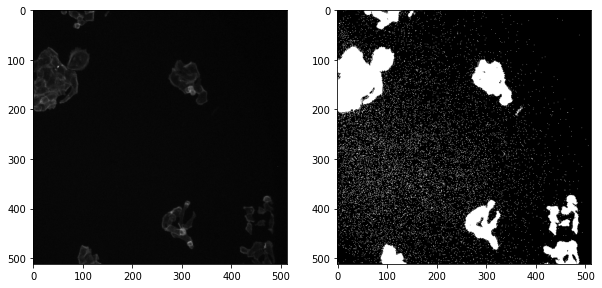

In [85]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 2, 1)
plt.imshow(original_images[4], cmap='gray')

ax = fig.add_subplot(1, 2, 2)
plt.imshow(logical_or_images[4], cmap='gray')

K-means for segmentation

In [ ]:
kmeans_segmented_images = []

for i in range(len(original_images)):
    
    v = np.float32(original_images[i].reshape(-1, 1))
    #print(v.shape)
    model = KMeans(n_clusters=5, random_state=0)
    labels = model.fit_predict(v)
    im_labels = labels.reshape(original_images[i].shape)
    im_labels = img_as_ubyte(im_labels)
    im_labels[im_labels > 0] = 1
    kmeans_segmented_images.append(im_labels)

In [60]:
# computing jaccard scores
kmeans_jaccard_scores = []
for i in range(len(mean_threshold_images)):
    kmeans_jaccard_scores.append(jaccard_score(ground_truth_images[i], kmeans_segmented_images[i], average='micro'))

print('Mean thresholded jaccard scores: ', kmeans_jaccard_scores)

print('Average Mean thresholded jaccard score: ', np.mean(kmeans_jaccard_scores))

Mean thresholded jaccard scores:  [0.8915746488674028, 0.1682183375011251, 0.8998306893886414, 0.09324455806322376, 0.1654814646522019, 0.8908068497981896, 0.15396900531458413, 0.7733993296864868, 0.8704229462959032, 0.8843631185906661, 0.16209149321510558, 0.18558531045408563]
Average Mean thresholded jaccard score:  0.5115823126523013


K-means for segmentation - adjusted images

In [19]:
kmeans_segmented_images = []

for i in range(len(adjusted_images)):
    
    v = np.float32(adjusted_images[i].reshape(-1, 1)) ** 1.5
    #print(v.shape)
    model = KMeans(n_clusters=7, random_state=0)
    labels = model.fit_predict(v)
    im_labels = labels.reshape(original_images[i].shape)
    im_labels = img_as_ubyte(im_labels)
    im_labels[im_labels > 0] = 1
    kmeans_segmented_images.append(im_labels)

C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 6 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 6 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 6 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 6 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\hamma\AppData\Local\Programs\Python\Python38\li

In [20]:
# computing jaccard scores
adj_kmeans_jaccard_scores = []
for i in range(len(kmeans_segmented_images)):
    adj_kmeans_jaccard_scores.append(jaccard_score(ground_truth_images[i], kmeans_segmented_images[i], average='micro'))

print('Mean thresholded jaccard scores: ', adj_kmeans_jaccard_scores)

print('Average Mean thresholded jaccard score: ', np.mean(adj_kmeans_jaccard_scores))

Mean thresholded jaccard scores:  [0.885945039171264, 0.34584808349609375, 0.5176352837527645, 0.39052390384092583, 0.1654814646522019, 0.3481390905617119, 0.9290825068799003, 0.954619976268331, 0.901506689180413, 0.9553307793643343, 0.9301657690058224, 0.10842562020259887]
Average Mean thresholded jaccard score:  0.6193920171980302
